In [92]:
import pandas as pd
import numpy as np

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("Titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We can first remove the columns from the dataframe that we know won't have any effect on our observations, namely 'PassengerId', 'Name', 'Ticket' and 'Cabin'. 

In [52]:
df.drop('PassengerId',axis=1, inplace=True)
df.drop('Name',axis=1, inplace=True)
df.drop('Ticket',axis=1, inplace=True)
df.drop('Cabin',axis=1, inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


Now we want to retrieve the basic info of our dataset to further our understanding of our domain.

In [53]:
df.shape

(891, 8)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [56]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [57]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

Below we can see from the columns without missing values that there were 549 casualties and 342 survivors.

          Pclass  Sex  Age  SibSp  Parch  Fare  Embarked
Survived                                                
0            549  549  424    549    549   549       549
1            342  342  290    342    342   342       340
Axes(0.125,0.11;0.775x0.77)


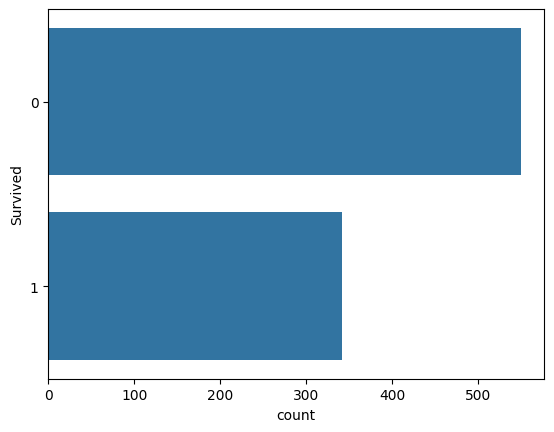

In [58]:
casualties = df.groupby('Survived').count()
print(casualties)
print(sns.countplot(y=df['Survived'], data=df))

We will now go through each column and see how each varaiable effects the survival rate.

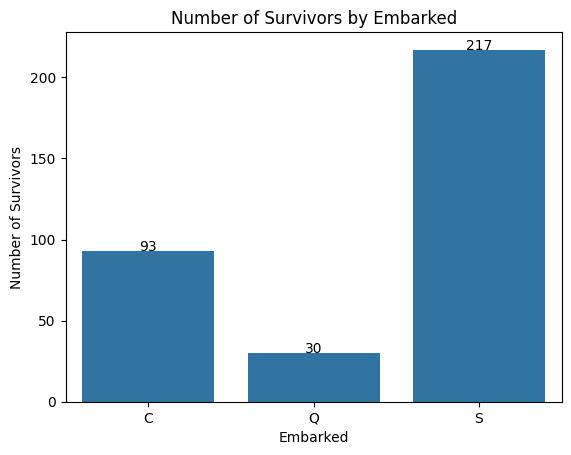

Total passengers embarked from 'C':  168     Survival rate =  55.4 %
Total passengers embarked from 'Q':  77      Survival rate =  39.0 %
Total passengers embarked from 'S':  644     Survival rate =  33.7 %


In [95]:
# Grouping the data by 'Embarked' and calculating the sum of 'Survived' for each group
survived_by_embarked = df.groupby('Embarked')['Survived'].sum().reset_index()

# Plotting the bar chart
ax = sns.barplot(data=survived_by_embarked, x='Embarked', y='Survived')
plt.ylabel('Number of Survivors')
plt.title('Number of Survivors by Embarked')

# Annotating each bar with its numerical value
for index, row in survived_by_embarked.iterrows():
    ax.text(index, row['Survived'], str(row['Survived']), color='black', ha="center")
    
plt.show()
print("Total passengers embarked from 'C': ", df['Embarked'].value_counts()['C'], "    Survival rate = ", round(((93 / 168) * 100), 1), "%")
print("Total passengers embarked from 'Q': ", df['Embarked'].value_counts()['Q'], "     Survival rate = ", round(((30 / 77) * 100), 1), "%")
print("Total passengers embarked from 'S': ", df['Embarked'].value_counts()['S'], "    Survival rate = ", round(((217 / 644) * 100), 1), "%")

The graph above shows us that passengers who embarked from 'C' were more likely to survive than those who embarked from 'Q' or 'S'.

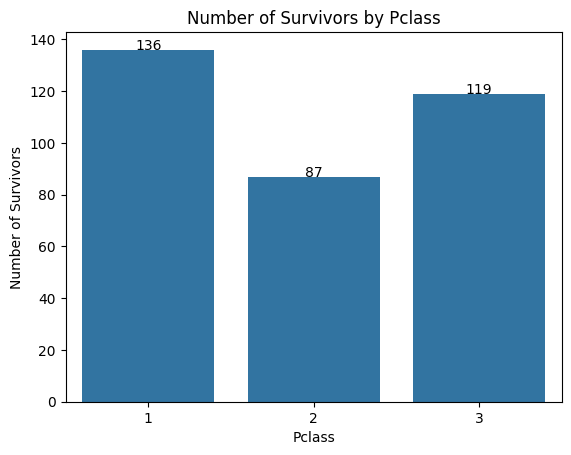

Total first class passengers:  216      Survival rate =  63.0 %
Total second class passengers:  184     Survival rate =  47.3 %
Total third class passengers:  491      Survival rate =  24.2 %


In [87]:
# Grouping the data by 'Pclass' and calculating the sum of 'Survived' for each group
survived_by_pclass = df.groupby('Pclass')['Survived'].sum().reset_index()

# Plotting the bar chart
ax = sns.barplot(data=survived_by_pclass, x='Pclass', y='Survived')
plt.ylabel('Number of Survivors')
plt.title('Number of Survivors by Pclass')

# Annotating each bar with its numerical value
for index, row in survived_by_pclass.iterrows():
    ax.text(index, row['Survived'], str(row['Survived']), color='black', ha="center")
    
plt.show()
print("Total first class passengers: ", df['Pclass'].value_counts()[1], "     Survival rate = ", round(((136 / 216) * 100), 1), "%")
print("Total second class passengers: ", df['Pclass'].value_counts()[2], "    Survival rate = ", round(((87 / 184) * 100), 1), "%")
print("Total third class passengers: ", df['Pclass'].value_counts()[3], "     Survival rate = ", round(((119 / 491) * 100), 1), "%")

The graph above shows that passengers from first class had a significantly higher chance of survival than those from second and third class. This is the second most important factor determining survival of the incident. This also implies that upper class passengers were likely given preference of lifeboats.

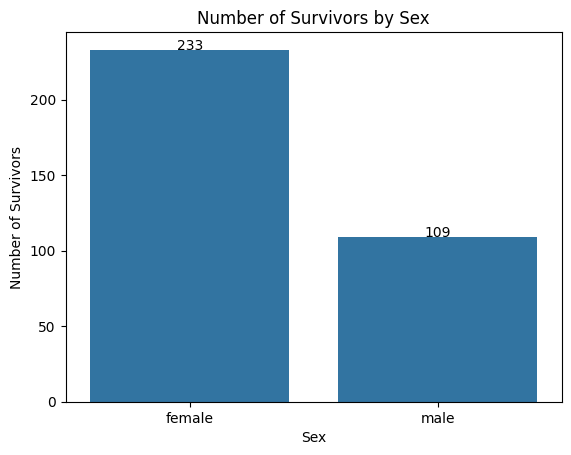

Total male passengers:  577       Survival rate =  18.9 %
Total female passengers:  314     Survival rate =  74.2 %


In [90]:
# Grouping the data by 'Sex' and calculating the sum of 'Survived' for each group
survived_by_sex = df.groupby('Sex')['Survived'].sum().reset_index()

# Plotting the bar chart
ax = sns.barplot(data=survived_by_sex, x='Sex', y='Survived')
plt.ylabel('Number of Survivors')
plt.title('Number of Survivors by Sex')

# Annotating each bar with its numerical value
for index, row in survived_by_sex.iterrows():
    ax.text(index, row['Survived'], str(row['Survived']), color='black', ha="center")
    
plt.show()
print("Total male passengers: ", df['Sex'].value_counts()['male'], "      Survival rate = ", round(((109 / 577) * 100), 1), "%")
print("Total female passengers: ", df['Sex'].value_counts()['female'], "    Survival rate = ", round(((233 / 314) * 100), 1), "%")

Above you can see that females had a significantly higher survival rate than males and this shows that sex was the most important factor in determining survival of the titanic incident.

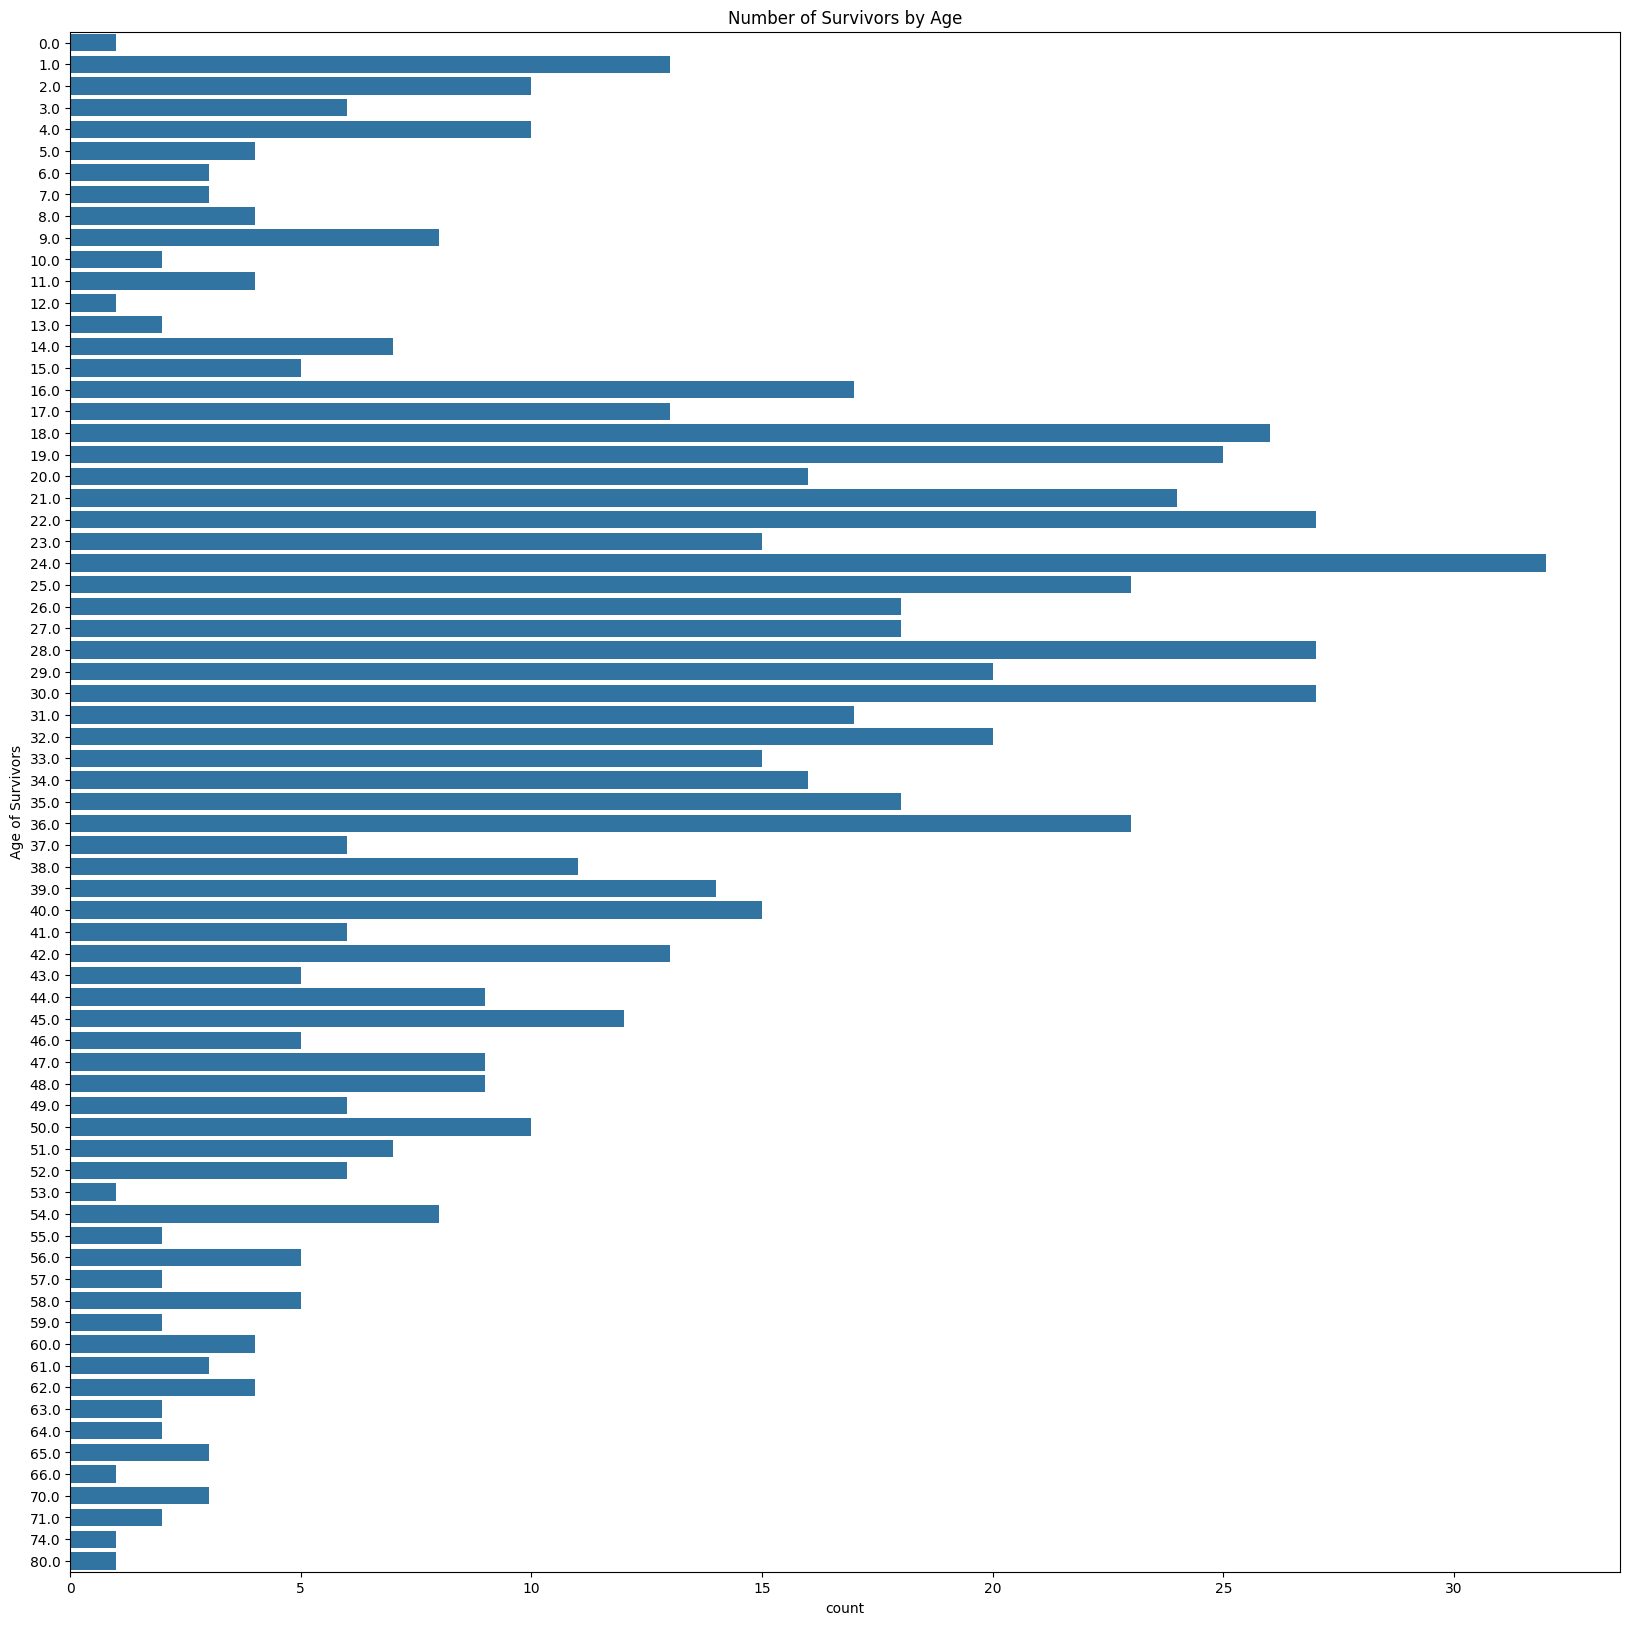

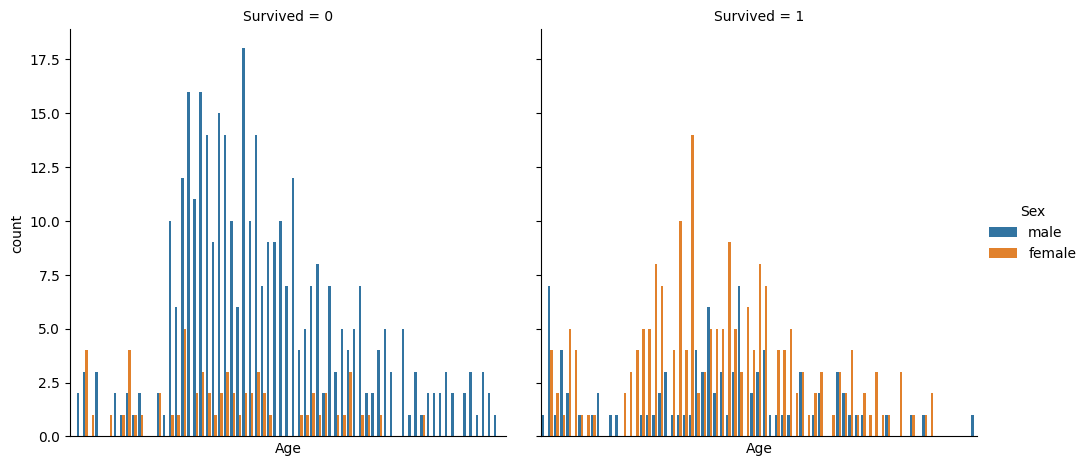

In [66]:
# Grouping the data by 'Age' and calculating the sum of 'Survived' for each group
df['Age'] = df['Age'].round(0)
survived_by_age = df.groupby('Age')['Survived'].sum().reset_index()

# Plotting the bar chart
fig = plt.figure(figsize=(20,20))
sns.countplot(y=df['Age'], data=survived_by_age)
plt.ylabel('Age')
plt.xlabel('Number of Survivors')
plt.title('Number of Survivors by Age')
plt.show()

# Using catplot to combine Sex and Age against Survived
sns.catplot(data=df, x='Age', hue='Sex', col='Survived', kind='count')
plt.xticks([])
plt.show()

In the two graphs above we can see that a greater proportion of children survived than those who didn't and there are more females who survived than males. Therefore these graphs and the high female survival rate indicates evidence to suggest that females and children were given priority for lifeboats.

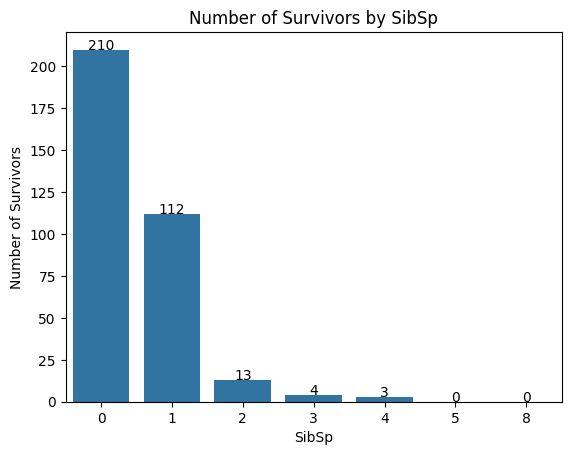

In [47]:
# Grouping the data by 'SibSp' and calculating the sum of 'Survived' for each group
survived_by_sibsp = df.groupby('SibSp')['Survived'].sum().reset_index()

# Plotting the bar chart
ax = sns.barplot(data=survived_by_sibsp, x='SibSp', y='Survived')
plt.ylabel('Number of Survivors')
plt.title('Number of Survivors by SibSp')

# Annotating each bar with its numerical value
for index, row in survived_by_sibsp.iterrows():
    ax.text(index, row['Survived'], str(row['Survived']), color='black', ha="center")
    
plt.show()

The graph above at first glance shows that number siblings or spouses could affect survival rate, however we already know from our df.describe() function above that the majority of passengers had zero siblings or spouses, therefore we cannot say whether it had a great effect on survival or not. The same is true for the parents/children graph below.

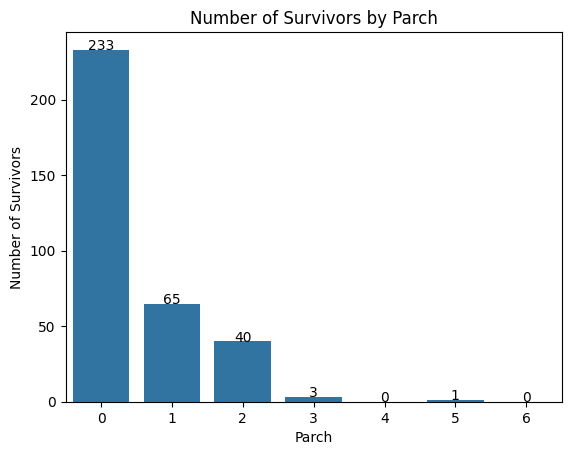

In [68]:
# Grouping the data by 'Parch' and calculating the sum of 'Survived' for each group
survived_by_parch = df.groupby('Parch')['Survived'].sum().reset_index()

# Plotting the bar chart
ax = sns.barplot(data=survived_by_parch, x='Parch', y='Survived')
plt.ylabel('Number of Survivors')
plt.title('Number of Survivors by Parch')

# Annotating each bar with its numerical value
for index, row in survived_by_parch.iterrows():
    ax.text(index, row['Survived'], str(row['Survived']), color='black', ha="center")
    
plt.show()

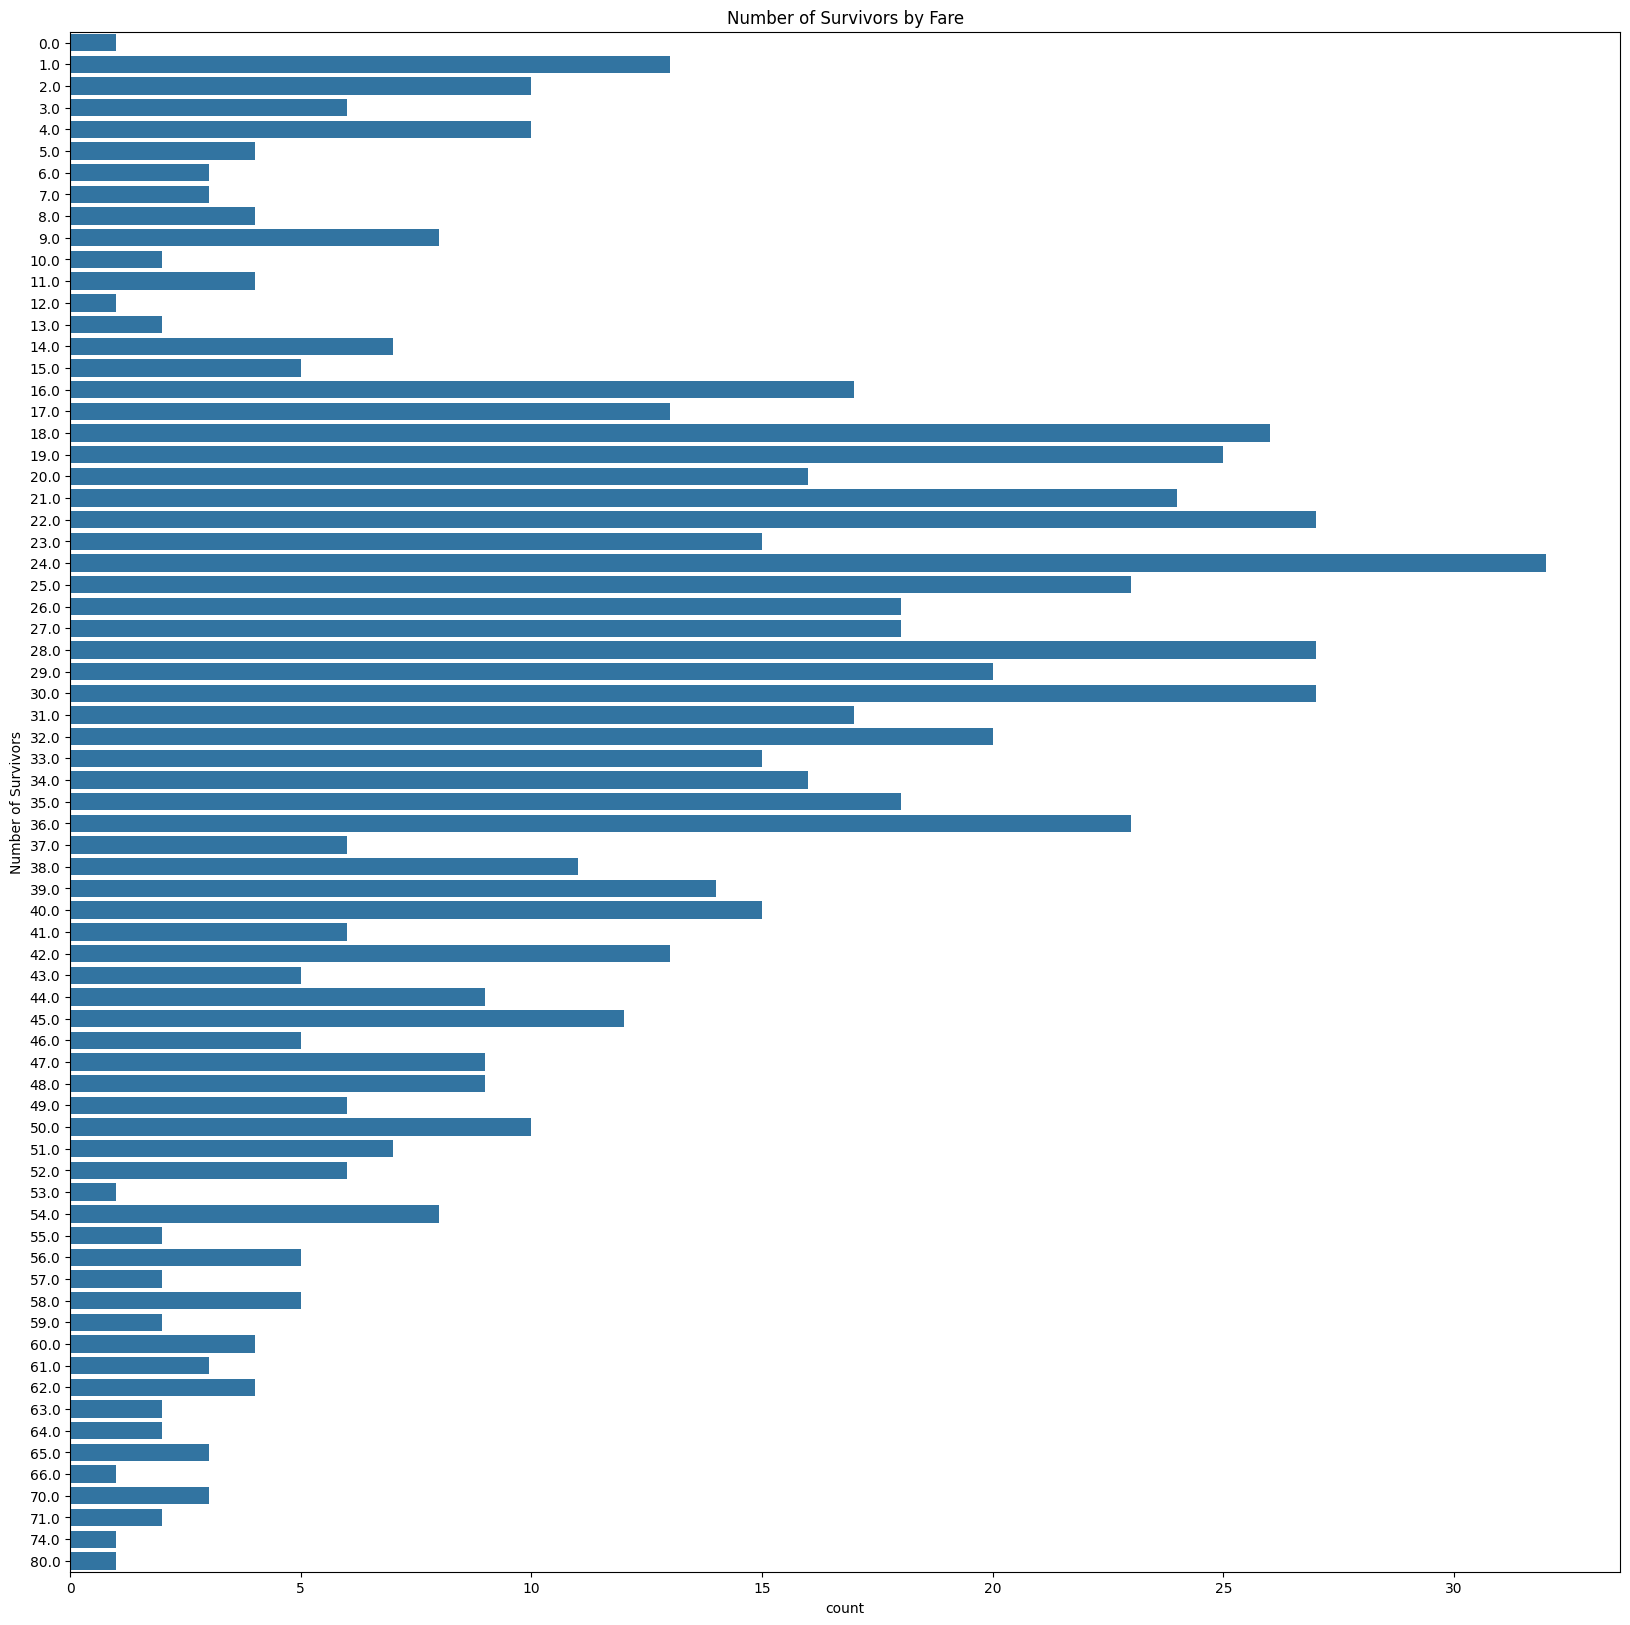

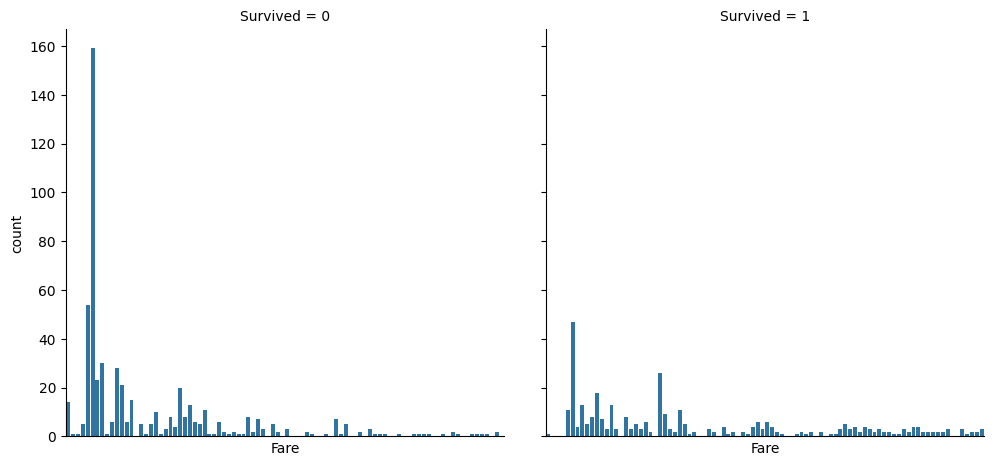

In [91]:
# Grouping the data by 'Fare' and calculating the sum of 'Survived' for each group
df['Fare'] = df['Fare'].round(0)
survived_by_fare = df.groupby('Fare')['Survived'].sum().reset_index()

# Plotting the bar chart
fig = plt.figure(figsize=(20,20))
sns.countplot(y=df['Age'], data=survived_by_age)
plt.ylabel('Number of Survivors')
plt.title('Number of Survivors by Fare')
    
plt.show()

# Using catplot to combine Sex and Age against Survived
sns.catplot(data=df, x='Fare', col='Survived', kind='count')
plt.xticks([])
plt.show()

The graphs above show that fare was not an important factor in determining survival of the titanic incident.